In [1]:
import pandas as pd


In [2]:
from sklearn.linear_model import LogisticRegression


In [3]:
from sklearn.metrics import roc_curve


In [4]:
import matplotlib.pyplot as p


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn import preprocessing

In [11]:
a=pd.read_csv('C:/Users/Shruti Deshpande/Downloads/Logistic_Regression_Binary_Classsification_Churn_Data.csv')

In [12]:
a

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
label_encoder=preprocessing.LabelEncoder()

In [18]:
a['Contract']=label_encoder.fit_transform(a['Contract'])
a['MonthlyCharges']=label_encoder.fit_transform(a['MonthlyCharges'])
a['TotalCharges']=label_encoder.fit_transform(a['TotalCharges'])
a['Churn']=label_encoder.fit_transform(a['Churn'])
a['PhoneService']=label_encoder.fit_transform(a['PhoneService'])

In [19]:
a

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,Yes,Electronic check,142,2505,0
1,5575-GNVDE,34,1,1,No,Mailed check,498,1466,0
2,3668-QPYBK,2,1,0,Yes,Mailed check,436,157,1
3,7795-CFOCW,45,0,1,No,Bank transfer (automatic),266,1400,0
4,9237-HQITU,2,1,0,Yes,Electronic check,729,925,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,Yes,Mailed check,991,1597,0
7039,2234-XADUH,72,1,1,Yes,Credit card (automatic),1340,5698,0
7040,4801-JZAZL,11,0,0,Yes,Electronic check,137,2994,0
7041,8361-LTMKD,4,1,0,Yes,Mailed check,795,2660,1


In [25]:
x1=a.drop(['customerID','PaperlessBilling','PaymentMethod'],axis=1)

In [26]:
x1

,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,0,142,2505,0
1,34,1,1,498,1466,0
2,2,1,0,436,157,1
3,45,0,1,266,1400,0
4,2,1,0,729,925,1
...,...,...,...,...,...,...
7038,24,1,1,991,1597,0
7039,72,1,1,1340,5698,0
7040,11,0,0,137,2994,0
7041,4,1,0,795,2660,1


In [28]:
x1.head()

,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,0,142,2505,0
1,34,1,1,498,1466,0
2,2,1,0,436,157,1
3,45,0,1,266,1400,0
4,2,1,0,729,925,1


In [29]:
x=x1.drop('Churn',axis=1)
x

,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges
0,1,0,0,142,2505
1,34,1,1,498,1466
2,2,1,0,436,157
3,45,0,1,266,1400
4,2,1,0,729,925
...,...,...,...,...,...
7038,24,1,1,991,1597
7039,72,1,1,1340,5698
7040,11,0,0,137,2994
7041,4,1,0,795,2660


In [30]:
y=x1.Churn
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [32]:
re=LogisticRegression()

In [33]:
re.fit(x_train,y_train)

F:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
pred=re.predict(x_test)

In [67]:
pred[0]

0

In [68]:
re.score(x_test, y_test)

0.7887563884156729

In [69]:
precision_score(y_test,pred)

0.6588921282798834

In [70]:
f1_score(y_test, pred)

0.5485436893203884

In [71]:
recall_score(y_test, pred)

0.4698544698544699

In [72]:
y_pred_prob = re.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

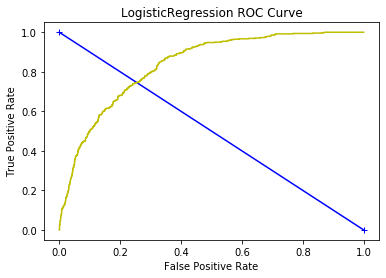

In [73]:
p.plot([0, 1], [1, 0], 'k-+',color='b')
p.plot(fpr, tpr, label='LogisticRegression',color='y')
p.xlabel('False Positive Rate')
p.ylabel('True Positive Rate')
p.title('LogisticRegression ROC Curve')
p.show()